<a target="_blank" href="https://colab.research.google.com/github/jgromero/dasoc-ap/blob/main/dogsVScats/dogsVScats-transferencia.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

# Transferencia de aprendizaje con _perros y gatos_

## Clasificar imagen de prueba con redes preentrenadas

Cargar imagen de prueba.

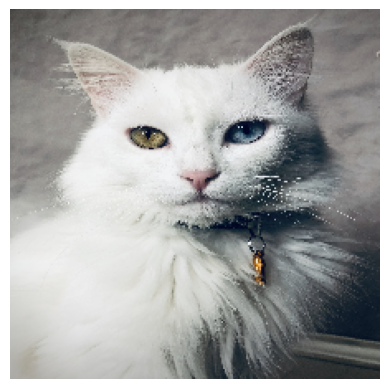

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

img = load_img("./cat1.jpg", target_size=(224, 224))  # dragon1.jpg, cat1.jpg
img_array = img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.show()

Importar red pre-entrenada; por ejemplo, [ResNet50](https://keras.io/api/applications/resnet/).

In [2]:
from tensorflow.keras.applications import ResNet50

resnet50_model = ResNet50(weights='imagenet')
resnet50_model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Clasificar imagen de muestra usando [ResNet50](https://keras.io/api/applications/resnet/).

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Preprocesar imagen para el modelo ResNet50
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
processed_img = preprocess_input(img_array_expanded_dims)

# Realizar predicción
predictions = resnet50_model.predict(processed_img)

# Decodificar y mostrar las 3 predicciones principales
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {imagenet_id} {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1: n02123394 Persian_cat (0.89)
2: n02123045 tabby (0.02)
3: n04589890 window_screen (0.01)


## Descargar datos _perros y gatos_

Descargar y descomprimir [fichero de datos](https://drive.google.com/open?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b&usp=drive_fs).

In [4]:
import os
import zipfile

if not os.path.exists('cats_and_dogs_small'):
    !gdown 1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b

    with zipfile.ZipFile('cats_and_dogs_small.zip', 'r') as zip_ref:
        zip_ref.extractall()

    folders = os.listdir('cats_and_dogs_small')
    print(folders)

Downloading...
From (original): https://drive.google.com/uc?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b
From (redirected): https://drive.google.com/uc?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b&confirm=t&uuid=72e36f35-7576-4e84-95ae-524a798b8a3d
To: /content/cats_and_dogs_small.zip
100% 186M/186M [00:07<00:00, 23.8MB/s]
['.DS_Store', 'train', 'validation', 'test']


Configurar directorios.

In [5]:
train_dir      = './cats_and_dogs_small/train/'
validation_dir = './cats_and_dogs_small/validation/'
test_dir       = './cats_and_dogs_small/test/'

Definir conjuntos de datos.

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Reutilizar extracción de características

### Modificar solamente la parte _Dense_

Cargar [ResNet50](https://keras.io/api/applications/resnet/) como modelo de Keras sin incluir la sección específica de clasificación para Imagenet.

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


_Congelar_ todas las capas del modelo base para que no se actualicen los pesos durante el entrenamiento.



In [8]:
for layer in base_model.layers:
    layer.trainable = False

Añadir capas [`Dense`](https://keras.io/api/layers/core_layers/dense/) específicas para este problema de clasificación.





In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Preparar el modelo e iniciar el entrenamiento.

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.8641 - loss: 5.5104 - val_accuracy: 0.9530 - val_loss: 0.8456
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9910 - loss: 0.0742 - val_accuracy: 0.9550 - val_loss: 0.8699
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9951 - loss: 0.0432 - val_accuracy: 0.9510 - val_loss: 1.0044
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9530 - val_loss: 0.9751
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 1.0000 - loss: 2.0556e-04 - val_accuracy: 0.9570 - val_loss: 0.9024


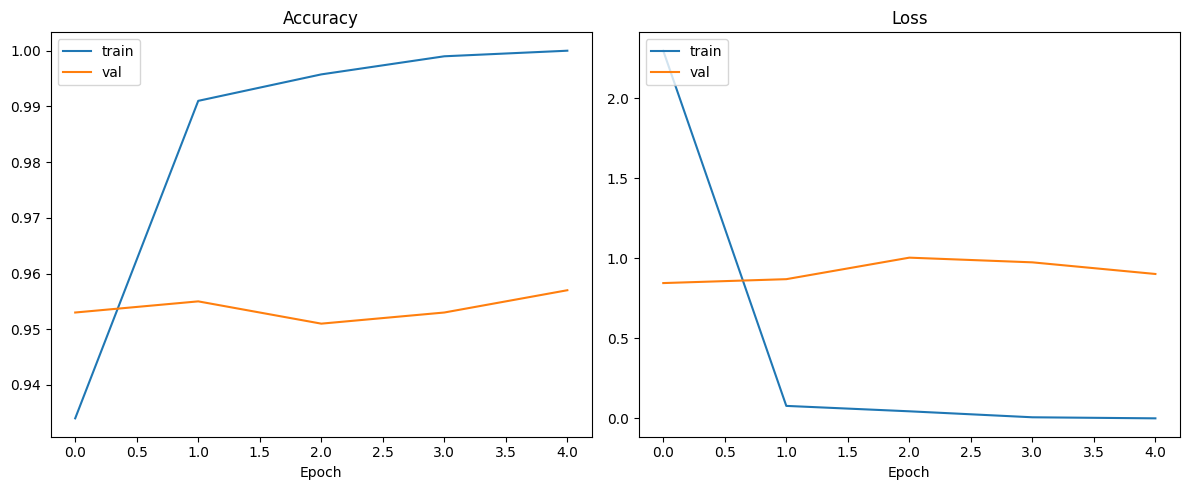

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Entrenar también algunas capas del modelo base

Cargar [ResNet50](https://keras.io/api/applications/resnet/) como modelo de Keras sin incluir la sección específica de clasificación para Imagenet.

In [12]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

_Descongelar_ todas las capas del modelo base a partir de una capa seleccionada; por ejemplo, `conv5_block1_out`.


In [13]:
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'conv5_block1_out':
        set_trainable = True
    layer.trainable = set_trainable

Añadir capas [`Dense`](https://keras.io/api/layers/core_layers/dense/) específicas para este problema de clasificación.

In [18]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Preparar el modelo e iniciar el entrenamiento.

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset
)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - accuracy: 0.9348 - loss: 0.6929 - val_accuracy: 0.7980 - val_loss: 162.0542
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9922 - loss: 0.0376 - val_accuracy: 0.9460 - val_loss: 0.4096
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9976 - loss: 0.0121 - val_accuracy: 0.9460 - val_loss: 0.4933
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9979 - loss: 0.0041 - val_accuracy: 0.9550 - val_loss: 0.4986
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9530 - val_loss: 0.4643
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 1.0000 - loss: 2.8839e-05 - val_accuracy: 0.9490 - val_loss: 0.4552
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 1.0000 - loss: 2.3755e-06 - val_accuracy: 0.9490 - val_loss: 0.4552
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 1.0000 - l

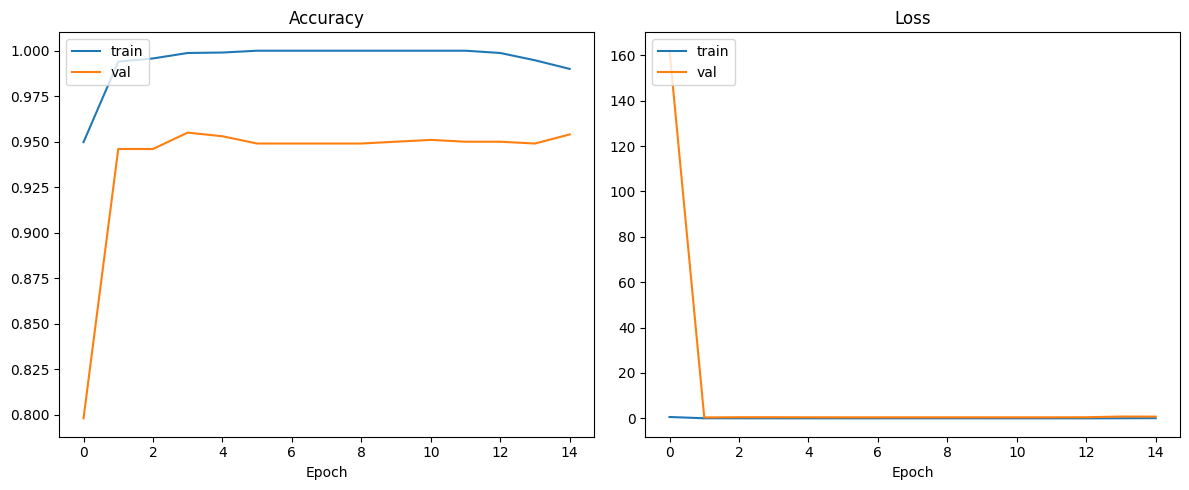

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()